<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/Prelab_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreLab 3.1

Goals:

* Use `sympy` for symbolic algebra computations.
* Convert symbolic expressions to fuctions so they can be graphed.
* Write a function to produce Taylor Polynomials



Libraries! We are adding a new library called `sympy`.


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

## Symbolic Algebra

In computing, the process of manipulating mathematical variables according to the rules of algebra is called "symbolic algebra."  In order to get python to perform symbolic algebra, we use the `sympy` package.  `sympy` defines a new type of variable called a "symbol".  We can make any variable into a new symbol using `sympy.Symbol()`.  The argument is a string that says how the variable will be displayed.

In [2]:
#define a symbolic variable u.  Notice 'Symbol' is capitalized.
u=sympy.Symbol('u')

Now we can have all kinds of fun with `u`.  Whenever python sees it, it will know that it is a symbolic variable, and gets sympy to handle it correctly.  Here are some examples of computations and functions.  Make sure you see what each one is doing.

In [3]:
#Collecting like terms
(u**2+3*u+7)+(2*u**2-5*u+6)

3*u**2 - 2*u + 13

In [4]:
# Expanding a product of two or more polynomials
sympy.expand((u+1)*(u+4)*(u**2-7*u+10))

u**4 - 2*u**3 - 21*u**2 + 22*u + 40

We can also save these expressions as variables to be manipulated later.

In [16]:
# Save an expansion as a variable
poly=sympy.expand((u+1)*(u+4)*(u**2-7*u+10))

# Take a derivative with respect to u, plugging in a previously defined expression
# Since this is the last line, it will print
sympy.diff(poly,u)

4*u**3 - 6*u**2 - 42*u + 22

### Exercise 1

1. What happens if you don't expand when you define `poly`?  Do you see how `sympy` is computing the derivative?
2. What happens if you define `u=sympy.Symbol('elephant')` and rerun some of these examples?
3. `sympy.diff` takes an optional third argument.  See if you can figure out what `sympy.diff(poly,u,1)`, `sympy.diff(poly,u,2)`, `sympy.diff(poly,u,3)`, and `sympy.diff(poly,u,4)` do.
4. What does `sympy.diff(poly,u,0)` return, and why does this make sense?

In [21]:
# Q1
# Save an expansion as a variable
# poly=(u+1)*(u+4)*(u**2-7*u+10)

# Take a derivative with respect to u, plugging in a previously defined expression
# Since this is the last line, it will print
sympy.diff(poly,u)

# Q2
elephant = sympy.Symbol('elephant')
expr = (elephant + 1)**2
sympy.diff(expr, elephant)

# Q3
sympy.diff(poly,u,1)
sympy.diff(poly,u,2)
sympy.diff(poly,u,3)
sympy.diff(poly,u,4)

# Q4
sympy.diff(poly,u,0)


u**4 - 2*u**3 - 21*u**2 + 22*u + 40


---
If we want to plot the symbolic expressions we have generated, we
run into a problem.  These expressions are not functions that we can apply to an array.  Fortunately, there the `sympy.lambdify()` method turns an expression into a function.  Now we can apply it to an array and plot the points.

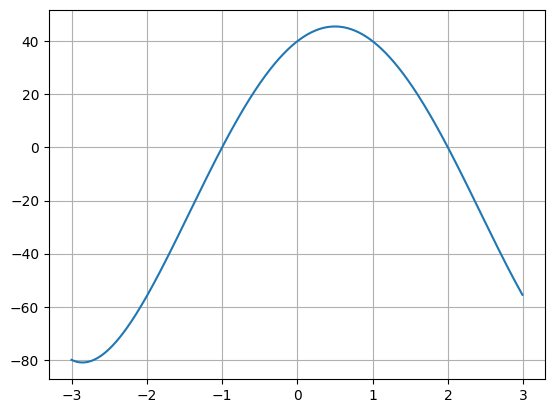

In [22]:
# define our x values
x=np.arange(-3,3,0.01)

# lambdify takes three arguments
# the variable, the expression to convert, and the library to
# convert any weird functions like trig or exponents into
# since we're using numpy, the library to choose is 'numpy'
# we assign this function to a variable f (which makes f a function too)
f=sympy.lambdify(u, poly, 'numpy')

# apply f to the array x
y=f(x)

# create a plot on an axis, the usual way
ax=plt.axes()
ax.plot(x,y)
ax.grid()
plt.show()

### Exercise 2

Use a code cell to explore how `sympy` handles trigonometric expressions.
1. Save the expression `sympy.cos(2*u)` in sympy to a variable.
2. Save the first and second derivatives of $\cos(2u)$ to two other variables.
3. Print those two derivatives and see that `sympy` has differentiated correctly.
4. Use `sympy.lambdify()` to convert all three expressions into functions.
5. Plot all three functions on a single graph.

Note that it is important that we use the 'numpy' library in our `lambdify`.  That tells the interpreter to replace `sympy.cos()` with `np.cos()` for evaluation.

First derivative: -2*sin(2*u)
Second derivative: -4*cos(2*u)


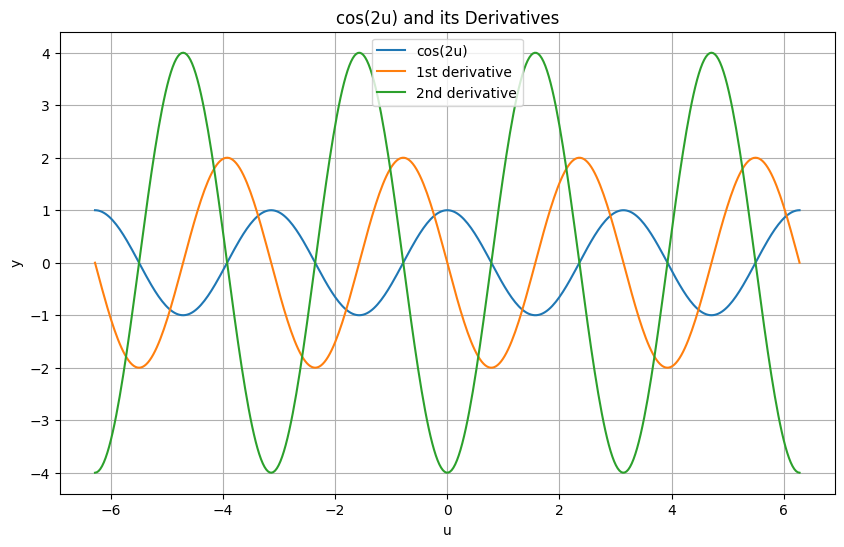

In [26]:
# define the expression
u = sympy.Symbol('u')
expr = sympy.cos(2 * u)

# save d1 and d2
expr_d1 = sympy.diff(expr, u, 1)
expr_d2 = sympy.diff(expr, u, 2)

# print out derivatives
print("First derivative:", expr_d1)
print("Second derivative:", expr_d2)

# lambdify functions
f0 = sympy.lambdify(u, expr, 'numpy')
f1 = sympy.lambdify(u, expr_d1, 'numpy')
f2 = sympy.lambdify(u, expr_d2, 'numpy')

# define graph elements
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y0 = f0(x)
y1 = f1(x)
y2 = f2(x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y0, label='cos(2u)')
plt.plot(x, y1, label="1st derivative")
plt.plot(x, y2, label="2nd derivative")
plt.title("cos(2u) and its Derivatives")
plt.xlabel("u")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()




---


If we just want to evaluate a `sympy` expression at a single value, we don't need to lambdify it.  We can apply the `subs()` method to the expression

In [27]:
# The factorial function in sympy. The expression u! is saved to expr
expr=sympy.factorial(u)

# replace u with 5 in the expression.
# Since this is the last line it will print
expr.subs(u,5)

120

## Generating Taylor Polynomials

The final task is to write a function that generates Taylor polynomials in `sympy`.  

### Exercise 3
Define a new symbol `x`. Then define a new function `taylorpoly(f,a,n)`.  
 * `f` will be a sympy expression
 * `a` will be the center (a number)
 * `n` will be the degree (a positive integer)

This function should
1. Start by assigning `0` to the variable `poly`
2. For each value of `k` from `0` to `n`
 * Compute the `k`th derivative of `f`, save it as `der`
 * Evaluate the `k`th derivative at `a`, save it as `derval`
 * Save the expression $\frac{f^{(k)}(a)}{k!}(x-a)^k$ to the the variable `term`
 * Add the term to `poly` and save the result back to `poly`
3. Return `poly` once all the terms are added to it

Test your function. The output of `taylorpoly(sympy.cos(2*x),0,4)` should be `2*x**4/3 - 2*x**2 + 1`.  

Hint: if you're missing a term, look carefully at what values of `k` your `for` loop is using.

In [28]:
# define symbol x
x = sympy.Symbol('x')

# define the taylor polynomial function
def taylorpoly(f, a, n):
    poly = 0
    for k in range(n + 1):
        der = sympy.diff(f, x, k)
        derval = der.subs(x, a)
        term = (derval / sympy.factorial(k)) * (x - a)**k
        poly += term
    return poly

# test the function
f_test = sympy.cos(2 * x)

taylor_test = taylorpoly(f_test, 0, 4)

print(taylor_test)

2*x**4/3 - 2*x**2 + 1
